In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('srazky.csv')
df

,rok,duben,kveten,cerven,cervenec,srpen,zari,rijen,listopad
0,2022,36.0,80,83.5,39,98.0,88.0,28.0,18.0
1,2021,8.5,87,86.0,118,88.0,18.0,12.5,19.0
2,2020,NaN,44,196.5,78,125.5,87.5,146.0,31.5


In [4]:
df_t = df.transpose()
df_t.columns = df_t.iloc[0]
df_t = df_t[1:]
df_t.columns.names = ['mesic']
df_t

mesic,2022.0,2021.0,2020.0
duben,36.0,8.5,NaN
kveten,80.0,87.0,44.0
cerven,83.5,86.0,196.5
cervenec,39.0,118.0,78.0
srpen,98.0,88.0,125.5
zari,88.0,18.0,87.5
rijen,28.0,12.5,146.0
listopad,18.0,19.0,31.5


    rok  values
0  2022   470.5
1  2021   437.0
2  2020   709.0


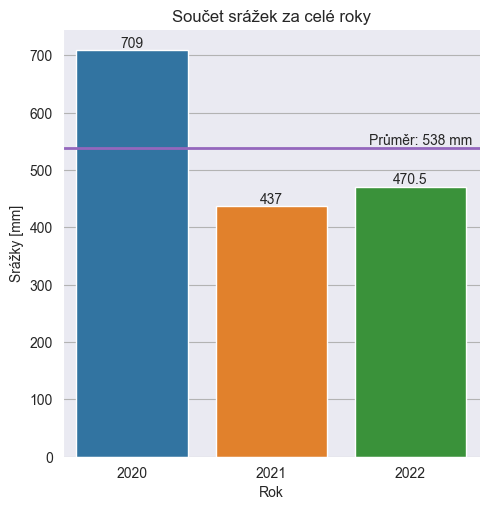

In [27]:
df_sum = df_t.sum(axis=0).reset_index()
df_sum.columns = ['rok', 'values']
df_sum['rok'] = df_sum['rok'].astype('int')
print(df_sum)
sns.set_style('darkgrid', {"grid.color": ".7"})
g = sns.catplot(df_sum, x='rok', y='values', kind='bar').set(title='Součet srážek za celé roky')
g.set_axis_labels('Rok', 'Srážky [mm]')
# values over bars
ax = g.facet_axis(0,0)
ax.bar_label(ax.containers[0])
prumer = df_sum['values'].mean()
ax.axhline(prumer, color='tab:purple', linewidth=2)
ax.text(1.7, prumer, f"Průměr: {int(prumer)} mm", va='bottom')
g.savefig('cele_roky.jpg')

In [6]:
xx = df_t.stack()
xx.index.names = ['mesic', 'rok']
xx.name = 'values'
xx = xx.reset_index()
xx['rok'] = xx['rok'].astype('int')
xx



,mesic,rok,values
0,duben,2022,36.0
1,duben,2021,8.5
2,kveten,2022,80.0
3,kveten,2021,87.0
4,kveten,2020,44.0
5,cerven,2022,83.5
6,cerven,2021,86.0
7,cerven,2020,196.5
8,cervenec,2022,39.0
9,cervenec,2021,118.0


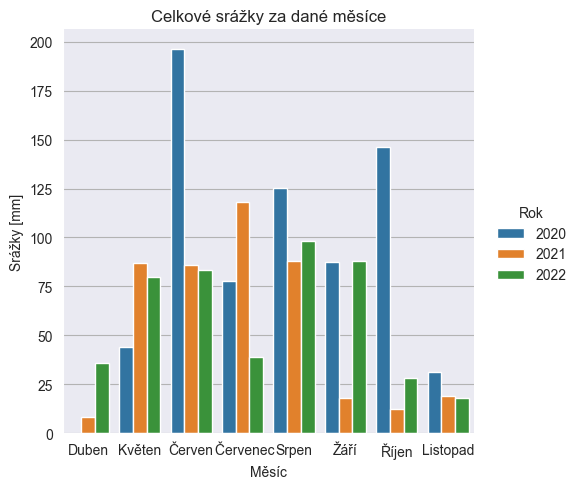

In [26]:
sns.set_style('darkgrid', {"grid.color": ".7"})
# sns.set_palette('deep')
g = sns.catplot(xx, x='mesic', y='values', kind='bar', hue="rok")
g.set_axis_labels('Měsíc', 'Srážky [mm]')
g.set_xticklabels(labels=['Duben','Květen','Červen',' Červenec','Srpen','Žáří','Říjen','Listopad'])
g.set(title='Celkové srážky za dané měsíce')
g._legend.set_title('Rok')
g.tight_layout()
g.savefig('mesice.jpg')